# Parcial 2. Clasificación de imágenes a partir de redes Convolucionales.

En esta actividad se aborda el problema de la clasificación de imágenes utilizando la base de datos CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html). Cada grupo de trabajo deberá diseñar y ejecutar una solución basada en redes neuronales convolucionales. Se considerarán dos aspectos principales para la evaluación del trabajo:

1. Planeación: antes de comenzar a diseñar cualquier modelo, cada grupo debe describir detalladamente la solución que plantea. Es importante que se justifiquen todas las decisiones tomadas (por ejemplo, la función de costo y la función de activación en la capa de salida). Además, se deben tener en cuenta características como el tipo de imágenes (a color), la cantidad de datos en el conjunto de entrenamiento y la cantidad de clases. Este elemento representa el 30% de la nota.

2. Ejecución: una vez descrita la solución propuesta, se procede a su implementación. Cada grupo debe asegurarse de que la implementación siga fielmente lo descrito en la propuesta, y justificar cualquier cambio que se realice en la ejecución. Este elemento representa el 70% de la nota.


Es importante destacar que las decisiones tomadas en la planeación que no estén debidamente justificadas pueden afectar la nota de ambos elementos.

¡Buena suerte!



In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0

170498071/170498071 [==============================] - 6s 0us/step


In [2]:
print('forma dataset prueba: {}'.format(X_train.shape))
print('forma dataset test: {}'.format(X_test.shape))

forma dataset prueba: (50000, 32, 32, 3)
forma dataset test: (10000, 32, 32, 3)


# 1. Planeación

# **Datos:**
Antes de empezar a la aclaracion sobre el modelo que se piensa usar, lo primero es que a las imagenes que pertenecen al dataset que se va aprobar en este modelo, es que se le debe hacer un reshape() para considerar que la imagen es a color y asi se va a tener en cuenta el RGB.

Se necesitan 3 dimensiones para tener en cuenta el RGB.

# **¿Que tipo de aprendizaje vamos a usar?**
Se va tomar la decision de tener una red neuronal creada por nosotros mismos para que de esta manera, se evite un sobre ajuste gracias al tamaño de los datos y tambien se tomo esta decision gracias a la forma en que estan organizados los datos.

# **Justificacion y creacion de la red neuronal:**
En filters se va a tomar como 32 ya que es el numero que se evidencio un comportamiento promedio, es decir, se estabiliza con respecto a numeros muy pequeños o grandes.

tamaño de de la imagen (kernel size) se tomo como (3,3) ya que gracias a diferentes pruebas se evidencio que para este tamaño de imagenes, era la dimension correcta.

Se va atomar como decision usar strides = (1,1) ya que esta es la forma en como se va a recorrer la imagen y de esta forma lograriamos recorrer la iamgen completa sin tener saltos y sin perder informacion.

Se va a tomar como decision usar un padding de same ya que no queremos que la imagen pierda su tamaño original.

Se va a tomar como optimizador adam, ya que tiene en cuenta los valores que ha conseguido anteriormente y esto ayuda a que si los tienen en cuenta, va a obtener un mejor valor global y de esta manera, la red tenga un mejor rendimiento.

Se usa funcion de activacion Relu ya que gracias a esta el algoritmo sea mucho más rapido y es mucho mas probable que encuentre la convergencia del algoritmo gradiente desenciente. 

Input shape es el tamaño de las imagenes adecuado, segun el dataset de este examen.

Se decide tomar la decision de hacer max pooling ya que esto simplifica un poco los calculos que hace nuestra red cnn.

Una capa de flatten ya que se se necesita trnasformar todo a una sola dimension.

dropout, para evitar un sobre ajuste, y este valor es promedio, es decir, se estabiliza entre un numero muy pequeño y uno muy alto.

La ultima capa de nuestra red neuronal usa softmax, ya que es una generalizacion de la funcion sigmoidal y es util pra las tareas de justificacion con multiples clases.

# 2. Implementación

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding="same", 
                        strides=(1, 1), activation='relu',input_shape=(32, 32, 3)),

    keras.layers.MaxPooling2D(pool_size =(2, 2), strides=(2, 2)),

    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), padding="same",
                        strides=(1, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size =(2, 2), strides=(2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

In [10]:
optimizer = tf.keras.optimizers.Adam(0.001)
optimizer.learning_rate.assign(0.004)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(optimizer.learning_rate)
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.004>
Epoch 1/30
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5290 - accuracy: 0.4526 - val_loss: 1.2148 - val_accuracy: 0.5758
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2180 - accuracy: 0.5733 - val_loss: 1.0782 - val_accuracy: 0.6263
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0895 - accuracy: 0.6201 - val_loss: 0.9539 - val_accuracy: 0.6738
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0223 - accuracy: 0.6432 - val_loss: 0.9602 - val_accuracy: 0.6682
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9733 - accuracy: 0.6593 - val_loss: 0.8915 - val_accuracy: 0.6964
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9311 - accuracy: 0.6731 - val_loss: 0.8775 - val_accuracy: 0.6977
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step 

313/313 [==============================] - 1s 3ms/step - loss: 0.7388 - accuracy: 0.7481
Trainining accuracy: 0.83
Testing accuracy: 0.75


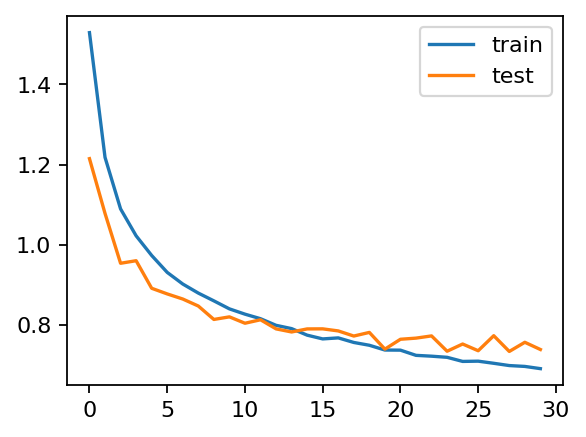

In [11]:
import matplotlib.pyplot as plt
def evaluate(model, history):
    # Se evalúa el accuracy del modelo tanto en el conjunto de entrenamiento como 
    # en el de prueba.
    _, train_accuracy = model.evaluate(X_train, y_train)
    _, test_accuracy = model.evaluate(X_test, y_test)

    print(f"Trainining accuracy: {train_accuracy:.2f}")
    print(f"Testing accuracy: {test_accuracy:.2f}")

    # Se grafica la función de costo para los conjuntos de entrenamiento y 
    # prueba.
    plt.figure(figsize=(4, 3), dpi=160)

    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend()
    plt.show()
evaluate(model, history)